# Tabular data exploration

In [1]:
import pandas as pd

In [2]:
adult_census = pd.read_csv("./datasets/adult.csv")

In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
target_column = "income"
adult_census[target_column].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [5]:
numerical_columns = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
categorical_columns = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [6]:
print(f"The dataset contains {adult_census.shape[0]} samples and "
      f"{adult_census.shape[1]} columns")

The dataset contains 32561 samples and 15 columns


In [7]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 14 features.


" tips: _ est une variable spéciale de python (garbage) pour stocker le retour d'une fonction inutile "

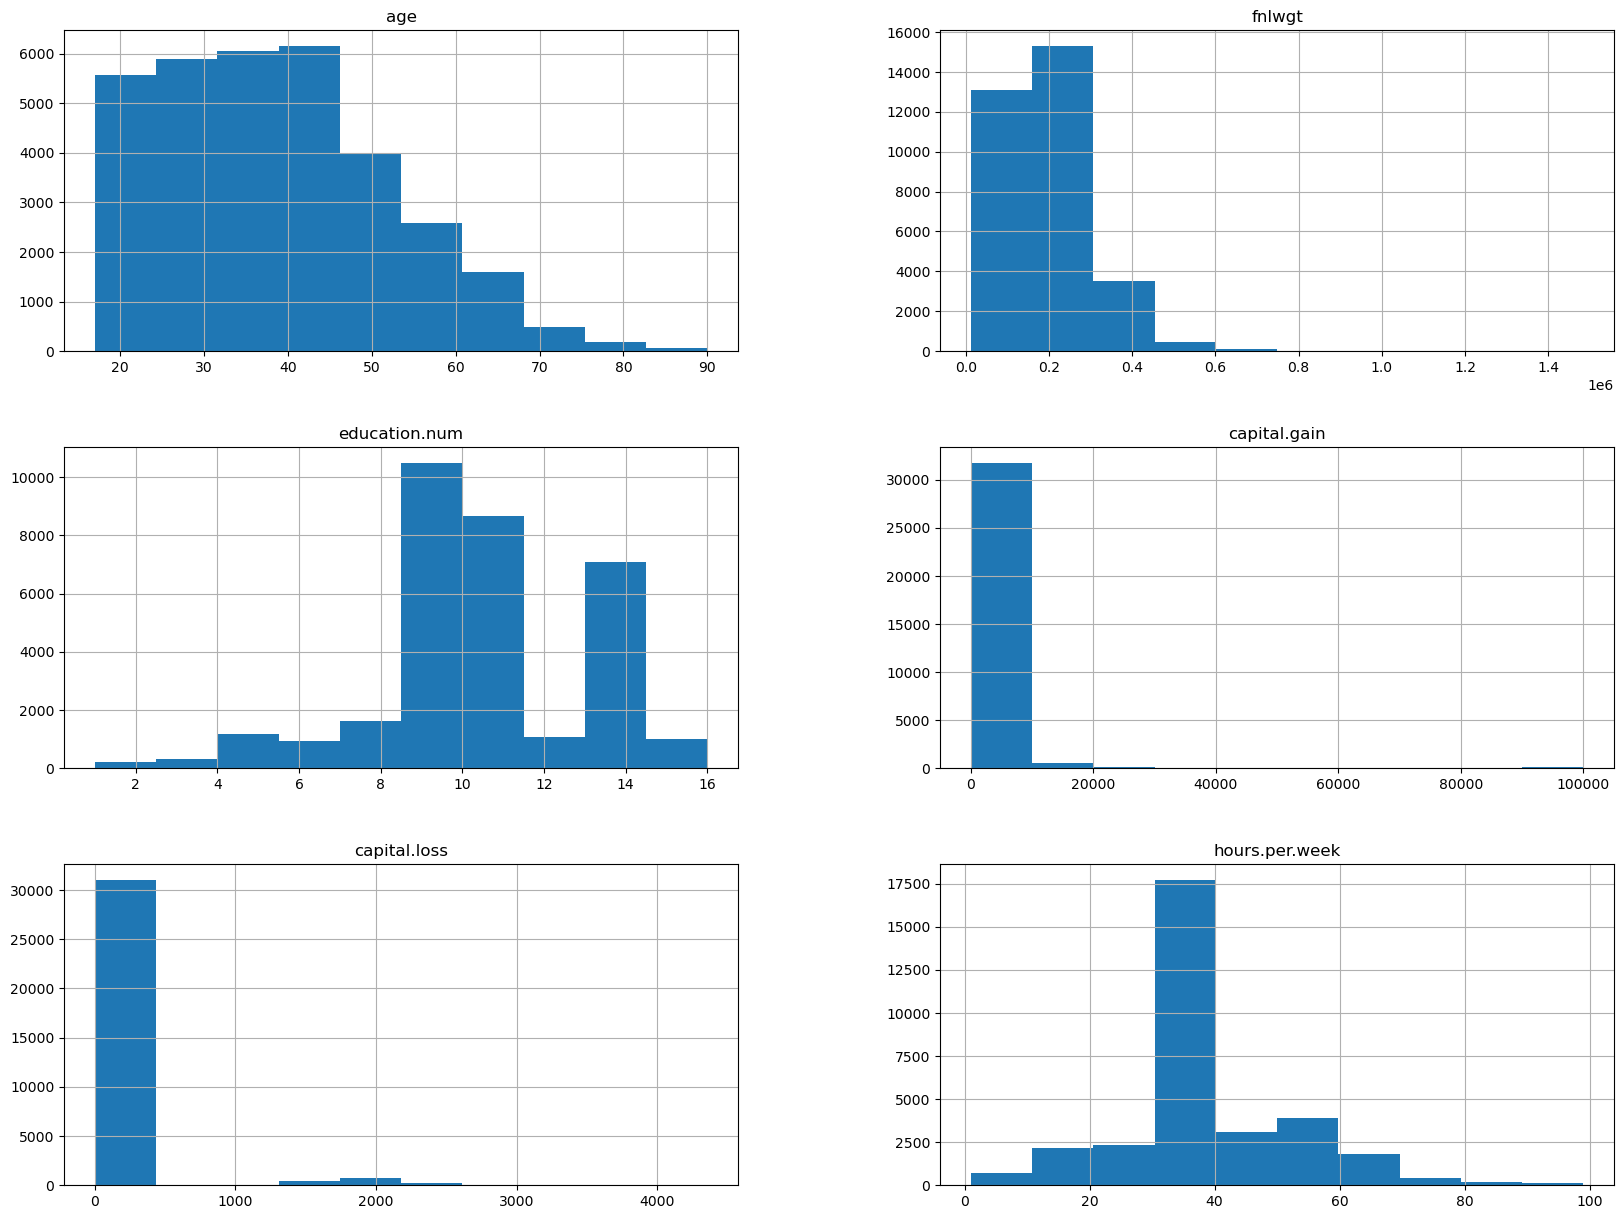

In [8]:
""" Les histogrammes ne sont possibles que pour les valeurs numériques """
_ = adult_census.hist(figsize=(20, 15))
""" tips: _ est une variable spéciale de python (garbage) pour stocker le retour d'une fonction inutile """

In [9]:
adult_census['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [10]:
adult_census['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [11]:
pd.crosstab(index=adult_census['education'],
            columns=adult_census['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


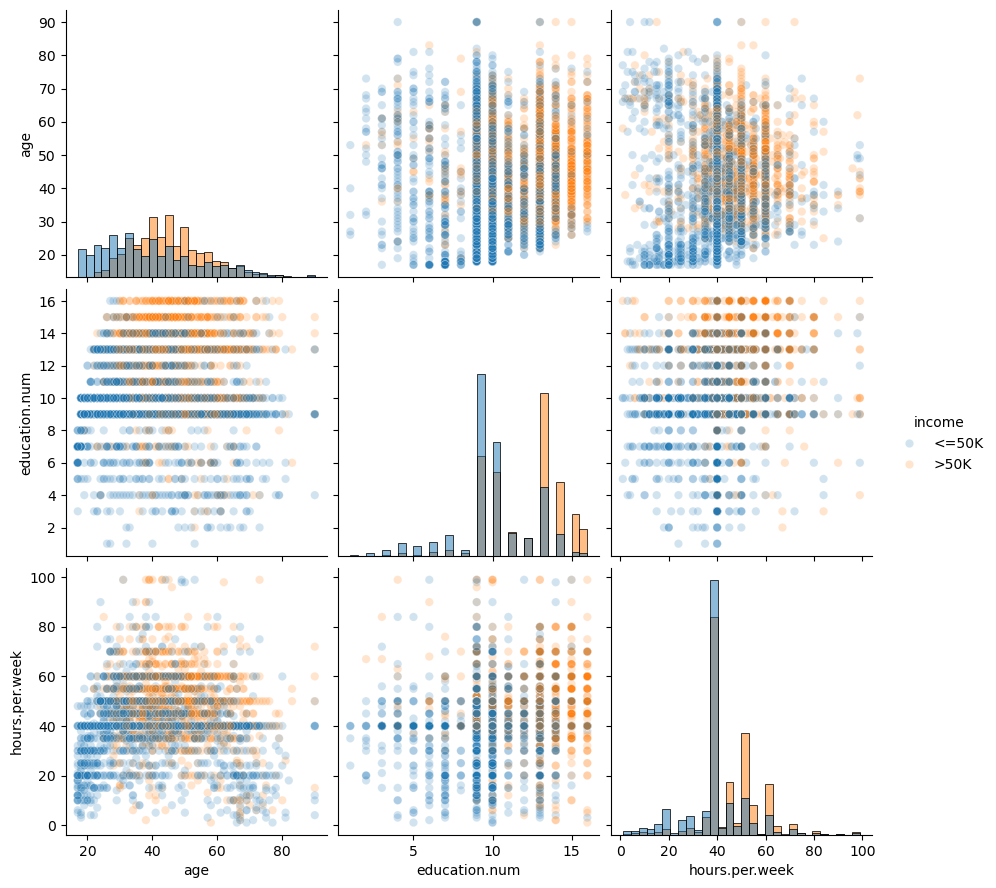

In [12]:
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting fast

n_samples_to_plot = 5000
columns = ['age', 'education.num', 'hours.per.week']
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

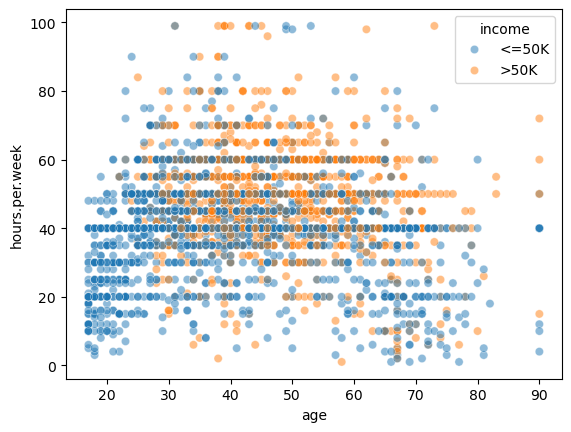

In [13]:
_ = sns.scatterplot(
    x="age", y="hours.per.week", data=adult_census[:n_samples_to_plot],
    hue="income", alpha=0.5,
)

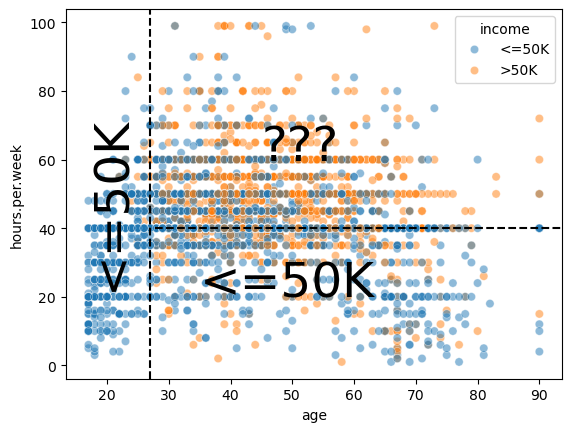

In [14]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age", y="hours.per.week", data=adult_census[:n_samples_to_plot],
    hue="income", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

# Fitting a scikit-learn model on numerical data

## First model with scikit-learn with only numerical data

In [15]:
import pandas as pd
adult_census = pd.read_csv("./datasets/adult_numeric.csv")

In [16]:
adult_census.head()

,age,capital.gain,capital.loss,hours.per.week,income
0,90,0,4356,40,<=50K
1,82,0,4356,18,<=50K
2,66,0,4356,40,<=50K
3,54,0,3900,40,<=50K
4,41,0,3900,40,<=50K


In [17]:
target_name = "income"
target = adult_census[target_name]
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [18]:
data = adult_census.drop(columns=[target_name, ])
data.head()

,age,capital.gain,capital.loss,hours.per.week
0,90,0,4356,40
1,82,0,4356,18
2,66,0,4356,40
3,54,0,3900,40
4,41,0,3900,40


In [19]:
data.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object')

In [20]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

The dataset contains 32561 samples and 4 features


## Fit a model and make predictions

We will build a classification model using the "K-nearest neighbors" strategy. To predict the target of a new sample, a k-nearest neighbors takes into account its k closest samples in the training set and predicts the majority target of these samples.

In [21]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

In [23]:
target_predicted = model.predict(data)

In [24]:
target_predicted[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

In [25]:
# comparison with the actual data

target[:5]

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [26]:
target[:5] == target_predicted[:5]

0    True
1    True
2    True
3    True
4    True
Name: income, dtype: bool

In [27]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 5 / 5


In [28]:
(target == target_predicted).mean()

0.811645833973158

## Train-test data split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized). It is harder to conclude on never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when training the model and using it afterwards for model evaluation. The data used to fit a model is called training data while the data used to assess a model is called testing data.

In [29]:
adult_census_test = pd.read_csv('./datasets/adult_numeric_test.csv')

In [30]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name, ])

In [31]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 1109 samples and 4 features


In [32]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.990


## Working with numerical data

- identifying numerical data in a heterogeneous dataset;
- selecting the subset of columns corresponding to numerical data;
- using a scikit-learn helper to separate data into train-test sets;
- training and evaluating a more complex scikit-learn model.


In [33]:
adult_census = pd.read_csv("./datasets/adult.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education.num")
adult_census.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [34]:
data, target = adult_census.drop(columns="income"), adult_census["income"]

In [35]:
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [36]:
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

### Identify numerical data

Numerical data are represented with numbers. They are linked to measurable (quantitative) data, such as age or the number of hours a person works a week.

Predictive models are natively designed to work with numerical data. Moreover, numerical data usually requires very little work before getting started with training.

The first task here will be to identify numerical data in our dataset.

In [37]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
dtype: object

In [38]:
data.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [39]:
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


We see that the object data type corresponds to columns containing strings. As we saw in the exploration section, these columns contain categories and we will see later how to handle those. We can select the columns containing integers and check their content.


In [40]:
numerical_columns = ["age", "capital.gain", "capital.loss", "hours.per.week"]
data[numerical_columns].head()

,age,capital.gain,capital.loss,hours.per.week
0,90,0,4356,40
1,82,0,4356,18
2,66,0,4356,40
3,54,0,3900,40
4,41,0,3900,40


Now that we limited the dataset to numerical columns only, we can analyse these numbers to figure out what they represent. We can identify two types of usage.

The first column, "age", is self-explanatory. We can note that the values are continuous, meaning they can take up any number in a given range. Let's find out what this range is:


In [41]:
data["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [42]:
data_numeric = data[numerical_columns]

### Train-test split the dataset

In the previous notebook, we loaded two separate datasets: a training one and a testing one. However, having separate datasets in two distincts files is unusual: most of the time, we have a single file containing all the data that we need to split once loaded in the memory.

Scikit-learn provides the helper function sklearn.model_selection.train_test_split which is used to automatically split the dataset into two subsets.


In [43]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

In [44]:


print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")



Number of samples in testing: 8141 => 25.0% of the original set


In [45]:
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in training: 24420 => 75.0% of the original set


In the previous notebook, we used a k-nearest neighbors model. While this model is intuitive to understand, it is not widely used in practice. Now, we will use a more useful model, called a logistic regression, which belongs to the linear models family.

In [46]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [48]:
model.fit(data_train, target_train)

LogisticRegression()

In [49]:
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.798


## Preprocessing for numerical features


   - an example of preprocessing, namely scaling numerical variables;
   - using a scikit-learn pipeline to chain preprocessing and model training;
   - assessing the generalization performance of our model via cross-validation instead of a single train-test split.


### Data preparation

In [50]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult.csv")

In [51]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [52]:
target_name = "income"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [53]:
numerical_columns = [
    "age", "capital.gain", "capital.loss", "hours.per.week"]

data_numeric = data[numerical_columns]

In [54]:
#Now we can divide our dataset into a train and test sets.
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

### Model fitting with preprocessing

A range of preprocessing algorithms in scikit-learn allow us to transform the input data before training a model. In our case, we will standardize the data and then train a new logistic regression model on that new version of the dataset.

Let's start by printing some statistics about the training data.


In [55]:
data_train.describe()

,age,capital.gain,capital.loss,hours.per.week
count,24420.000000,24420.000000,24420.000000,24420.000000
mean,38.534521,1100.636896,88.244554,40.546437
std,13.592626,7475.910059,405.319782,12.364975
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


We see that the dataset's features span across different ranges. Some algorithms make some assumptions regarding the feature distributions and usually normalizing features will be helpful to address these assumptions.

Tip

Here are some reasons for scaling features:

+ Models that rely on the distance between a pair of samples, for instance k-nearest neighbors, should be trained on normalized features to make each feature contribute approximately equally to the distance computations.
+ Many models such as logistic regression use a numerical solver (based on gradient descent) to find their optimal parameters. This solver converges faster when the features are scaled.

Whether or not a machine learning model requires scaling the features depends on the model family. Linear models such as logistic regression generally benefit from scaling the features while other models such as decision trees do not need such preprocessing (but will not suffer from it).

We show how to apply such normalization using a scikit-learn transformer called StandardScaler. This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

We will investigate different steps used in scikit-learn to achieve such a transformation of the data.

First, one needs to call the method fit in order to learn the scaling from the data.


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

The fit method for transformers is similar to the fit method for predictors. The main difference is that the former has a single argument (the data matrix), whereas the latter has two arguments (the data matrix and the target).

In this case, the algorithm needs to compute the mean and standard deviation for each feature and store them into some NumPy arrays. Here, these statistics are the model states


In [57]:
# We can inspect the computed means and standard deviations.
scaler.mean_

array([  38.53452088, 1100.63689599,   88.24455364,   40.54643735])

In [58]:
scaler.scale_

array([  13.59234787, 7475.75698813,  405.31148311,   12.36472145])

Note

scikit-learn convention: if an attribute is learned from the data, its name ends with an underscore, as in mean_ and scale_ for the StandardScaler.

Scaling the data is applied to each feature individually (i.e. each column in the data matrix). For each feature, we subtract its mean and divide by its standard deviation.

Once we have called the fit method, we can perform data transformation by calling the method transform

In [59]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[-0.03932513, -0.14722748,  6.09594238,  3.99956949],
       [-0.99574562, -0.14722748, -0.21772034, -0.04419326],
       [ 1.79994504, -0.14722748, -0.21772034,  0.76455929],
       ...,
       [ 1.21137858, -0.14722748,  4.43795826, -0.04419326],
       [ 0.18138729, -0.14722748, -0.21772034,  0.76455929],
       [-1.21645804, -0.14722748, -0.21772034,  0.76455929]])

Let's illustrate the internal mechanism of the transform method and put it to perspective with what we already saw with predictors.

The transform method for transformers is similar to the predict method for predictors. It uses a predefined function, called a transformation function, and uses the model states and the input data. However, instead of outputting predictions, the job of the transform method is to output a transformed version of the input data.

Finally, the method fit_transform is a shorthand method to call successively fit and then transform.

In [60]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[-0.03932513, -0.14722748,  6.09594238,  3.99956949],
       [-0.99574562, -0.14722748, -0.21772034, -0.04419326],
       [ 1.79994504, -0.14722748, -0.21772034,  0.76455929],
       ...,
       [ 1.21137858, -0.14722748,  4.43795826, -0.04419326],
       [ 0.18138729, -0.14722748, -0.21772034,  0.76455929],
       [-1.21645804, -0.14722748, -0.21772034,  0.76455929]])

In [61]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital.gain,capital.loss,hours.per.week
count,2.442000e+04,2.442000e+04,2.442000e+04,2.442000e+04
mean,-2.009131e-16,-1.869466e-17,6.634060e-17,2.182257e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.584312e+00,-1.472275e-01,-2.177203e-01,-3.198328e+00
25%,-7.750332e-01,-1.472275e-01,-2.177203e-01,-4.419326e-02
50%,-1.128959e-01,-1.472275e-01,-2.177203e-01,-4.419326e-02
75%,6.228121e-01,-1.472275e-01,-2.177203e-01,3.601830e-01
max,3.786357e+00,1.322921e+01,1.052957e+01,4.727447e+00


We can easily combine these sequential operations with a scikit-learn Pipeline, which chains together operations and is used as any other classifier or regressor. The helper function make_pipeline will create a Pipeline: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model

In [62]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

The make_pipeline function did not require us to give a name to each step. Indeed, it was automatically assigned based on the name of the classes provided; a StandardScaler will be a step named "standardscaler" in the resulting pipeline. We can check the name of each steps of our model:

In [63]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor: fit and predict (and additionally predict_proba, decision_function, or score).

In [64]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

When calling model.fit, the method fit_transform from each underlying transformer (here a single transformer) in the pipeline will be called to:

+ learn their internal model states
+ transform the training data. Finally, the preprocessed data are provided to train the predictor.

To predict the targets given a test set, one uses the predict method.


In [65]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

The method transform of each transformer (here a single transformer) is called to preprocess the data. Note that there is no need to call the fit method for these transformers because we are using the internal model states computed when calling model.fit. The preprocessed data is then provided to the predictor that will output the predicted target by calling its method predict.

As a shorthand, we can check the score of the full predictive pipeline calling the method model.score. Thus, let's check the computational and generalization performance of such a predictive pipeline.

In [66]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.798 with a fitting time of 0.061 seconds in 9 iterations


We could compare this predictive model with the predictive model used in the previous notebook which did not scale features.

In [67]:
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [68]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.798 with a fitting time of 0.132 seconds in 62 iterations


We see that scaling the data before training the logistic regression was beneficial in terms of computational performance. Indeed, the number of iterations decreased as well as the training time. The generalization performance did not change since both models converged.

#### Warning

Working with non-scaled data will potentially force the algorithm to iterate more as we showed in the example above. There is also the catastrophic scenario where the number of required iterations are more than the maximum number of iterations allowed by the predictor (controlled by the max_iter) parameter. Therefore, before increasing max_iter, make sure that the data are well scaled.


### Model evaluation using cross-validation

In the previous example, we split the original data into a training set and a testing set. The score of a model will in general depend on the way we make such a split. One downside of doing a single split is that it does not give any information about this variability. Another downside, in a setting where the amount of data is small, is that the data available for training and testing will be even smaller after splitting.

Instead, we can use cross-validation. Cross-validation consists of repeating the procedure such that the training and testing sets are different each time. Generalization performance metrics are collected for each repetition and then aggregated. As a result we can get an estimate of the variability of the model's generalization performance.

Note that there exists several cross-validation strategies, each of them defines how to repeat the fit/score procedure. In this section, we will use the K-fold strategy: the entire dataset is split into K partitions. The fit/score procedure is repeated K times where at each iteration K - 1 partitions are used to fit the model and 1 partition is used to score. The figure below illustrates this K-fold strategy.

For each cross-validation split, the procedure trains a model on all the red samples and evaluate the score of the model on the blue samples. Cross-validation is therefore computationally intensive because it requires training several models instead of one.

In scikit-learn, the function cross_validate allows to do cross-validation and you need to pass it the model, the data, and the target. Since there exists several cross-validation strategies, cross_validate takes a parameter cv which defines the splitting strategy.

In [69]:
%%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

CPU times: user 609 ms, sys: 21 ms, total: 630 ms
Wall time: 315 ms


{'fit_time': array([0.05281544, 0.0428071 , 0.04460549, 0.04361582, 0.04396415]),
 'score_time': array([0.00960732, 0.00945377, 0.0092988 , 0.00939536, 0.00938439]),
 'test_score': array([0.72516505, 0.81802826, 0.75629607, 0.75230344, 0.75675676])}

The output of cross_validate is a Python dictionary, which by default contains three entries: (i) the time to train the model on the training data for each fold, (ii) the time to predict with the model on the testing data for each fold, and (iii) the default score on the testing data for each fold.

Setting cv=5 created 5 distinct splits to get 5 variations for the training and testing sets. Each training set is used to fit one model which is then scored on the matching test set. This strategy is called K-fold cross-validation where K corresponds to the number of splits.

Note that by default the cross_validate function discards the 5 models that were trained on the different overlapping subset of the dataset. The goal of cross-validation is not to train a model, but rather to estimate approximately the generalization performance of a model that would have been trained to the full training set, along with an estimate of the variability (uncertainty on the generalization accuracy).

You can pass additional parameters to cross_validate to get more information, for instance training scores. These features will be covered in a future notebook.

Let's extract the test scores from the cv_result dictionary and compute the mean accuracy and the variation of the accuracy across folds.


In [70]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.762 +/- 0.030


Note that by computing the standard-deviation of the cross-validation scores, we can estimate the uncertainty of our model generalization performance. This is the main advantage of cross-validation and can be crucial in practice, for example when comparing different models to figure out whether one is better than the other or whether the generalization performance differences are within the uncertainty.

In this particular case, only the first 2 decimals seem to be trustworthy. If you go up in this notebook, you can check that the performance we get with cross-validation is compatible with the one from a single train-test split.

In this notebook we have:

    + seen the importance of scaling numerical variables;
    + used a pipeline to chain scaling and logistic regression training;
    + assessed the generalization performance of our model via cross-validation.

# Handling categorical data

## Encoding of categorical variables

In this notebook, we will present typical ways of dealing with categorical variables by encoding them, namely ordinal encoding and one-hot encoding.


In [71]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education.num")

target_name = "income"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

### Identify categorical variables

As we saw in the previous section, a numerical variable is a quantity represented by a real or integer number. These variables can be naturally handled by machine learning algorithms that are typically composed of a sequence of arithmetic instructions such as additions and multiplications.

In contrast, categorical variables have discrete values, typically represented by string labels (but not only) taken from a finite list of possible choices. For instance, the variable native-country in our dataset is a categorical variable because it encodes the data using a finite list of possible countries (along with the ? symbol when this information is missing):


In [72]:
data["native.country"].value_counts().sort_index()

native.country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

How can we easily recognize categorical columns among the dataset? Part of the answer lies in the columns' data type:

In [73]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
dtype: object

If we look at the "native-country" column, we observe its data type is object, meaning it contains string values.

### Select features based on their data type

In the previous notebook, we manually defined the numerical columns. We could do a similar approach. Instead, we will use the scikit-learn helper function make_column_selector, which allows us to select columns based on their data type. We will illustrate how to use this helper.

In [74]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

Here, we created the selector by passing the data type to include; we then passed the input dataset to the selector object, which returned a list of column names that have the requested data type. We can now filter out the unwanted columns:

In [75]:
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [76]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 8 features


### Strategies to encode categories

#### Encoding ordinal categories

The most intuitive strategy is to encode each category with a different number. The OrdinalEncoder will transform the data in such manner. We will start by encoding a single column to understand how the encoding works.


In [77]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["education"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[11.],
       [11.],
       [15.],
       ...,
       [11.],
       [11.],
       [11.]])

We see that each category in "education" has been replaced by a numeric value. We could check the mapping between the categories and the numerical values by checking the fitted attribute categories_

In [78]:
encoder.categories_

[array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object)]

In [79]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 0., 11.,  6.,  0.,  1.,  4.,  0., 39.],
       [ 4., 11.,  6.,  4.,  1.,  4.,  0., 39.],
       [ 0., 15.,  6.,  0.,  4.,  2.,  0., 39.],
       [ 4.,  5.,  0.,  7.,  4.,  4.,  0., 39.],
       [ 4., 15.,  5., 10.,  3.,  4.,  0., 39.]])

In [80]:
encoder.categories_

[array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
       dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo'

In [81]:
print(
    f"The dataset encoded contains {data_encoded.shape[1]} features")

The dataset encoded contains 8 features


We see that the categories have been encoded for each feature (column) independently. We also note that the number of features before and after the encoding is the same.

However, be careful when applying this encoding strategy: using this integer representation leads downstream predictive models to assume that the values are ordered (0 < 1 < 2 < 3... for instance).

By default, OrdinalEncoder uses a lexicographical strategy to map string category labels to integers. This strategy is arbitrary and often meaningless. For instance, suppose the dataset has a categorical variable named "size" with categories such as "S", "M", "L", "XL". We would like the integer representation to respect the meaning of the sizes by mapping them to increasing integers such as 0, 1, 2, 3. However, the lexicographical strategy used by default would map the labels "S", "M", "L", "XL" to 2, 1, 0, 3, by following the alphabetical order.

The OrdinalEncoder class accepts a categories constructor argument to pass categories in the expected ordering explicitly. You can find more information in the scikit-learn documentation if needed.

If a categorical variable does not carry any meaningful order information then this encoding might be misleading to downstream statistical models and you might consider using one-hot encoding instead (see below).

### Encoding nominal categories (without assuming any order)

OneHotEncoder is an alternative encoder that prevents the downstream models to make a false assumption about the ordering of categories. For a given feature, it will create as many new columns as there are possible categories. For a given sample, the value of the column corresponding to the category will be set to 1 while all the columns of the other categories will be set to 0.

We will start by encoding a single feature (e.g. "education") to illustrate how the encoding works.

In [82]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We see that encoding a single feature will give a NumPy array full of zeros and ones. We can get a better understanding using the associated feature names resulting from the transformation.

In [83]:
feature_names = encoder.get_feature_names_out(input_features=["education"])
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As we can see, each category (unique value) became a column; the encoding returned, for each sample, a 1 to specify which category it belongs to.

Let's apply this encoding on the full dataset.

In [84]:
print(
    f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 8 features


,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [85]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [86]:
print(
    f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 102 features


In [87]:
# Let's wrap this NumPy array in a dataframe with informative column names as provided by the encoder object:

columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Look at how the "workclass" variable of the 3 first records has been encoded and compare this to the original string representation.

The number of features after the encoding is more than 10 times larger than in the original data because some variables such as occupation and native-country have many possible categories.

#### Choosing an encoding strategy

Choosing an encoding strategy will depend on the underlying models and the type of categories (i.e. ordinal vs. nominal).

Indeed, using an OrdinalEncoder will output ordinal categories. It means that there is an order in the resulting categories (e.g. 0 < 1 < 2). The impact of violating this ordering assumption is really dependent on the downstream models. Linear models will be impacted by misordered categories while tree-based models will not be.

Thus, in general OneHotEncoder is the encoding strategy used when the downstream models are linear models while OrdinalEncoder is used with tree-based models.

You still can use an OrdinalEncoder with linear models but you need to be sure that:

    the original categories (before encoding) have an ordering;
    the encoded categories follow the same ordering than the original categories. The next exercise highlight the issue of misusing OrdinalEncoder with a linear model.

Also, there is no need to use a OneHotEncoder even if the original categories do not have a given order with tree-based model. It will be the purpose of the final exercise of this sequence.


### Evaluate our predictive pipeline

We can now integrate this encoder inside a machine learning pipeline like we did with numerical data: let's train a linear classifier on the encoded data and check the generalization performance of this machine learning pipeline using cross-validation.

Before we create the pipeline, we have to linger on the native-country. Let's recall some statistics regarding this column.


In [88]:
data["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

We see that the Holand-Netherlands category is occurring rarely. This will be a problem during cross-validation: if the sample ends up in the test set during splitting then the classifier would not have seen the category during training and will not be able to encode it.

In scikit-learn, there are two solutions to bypass this issue:

- list all the possible categories and provide it to the encoder via the keyword argument categories;
- use the parameter handle_unknown.

Here, we will use the latter solution for simplicity.



Tip

Be aware the OrdinalEncoder exposes as well a parameter handle_unknown. It can be set to use_encoded_value and by setting unknown_value to handle rare categories. You are going to use these parameters in the next exercise.


We can now create our machine learning pipeline.

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500)
)

Note

Here, we need to increase the maximum number of iterations to obtain a fully converged LogisticRegression and silence a ConvergenceWarning. Contrary to the numerical features, the one-hot encoded categorical features are all on the same scale (values are 0 or 1), so they would not benefit from scaling. In this case, increasing max_iter is the right thing to do.


Finally, we can check the model's generalization performance only using the categorical columns.

In [90]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_categorical, target)
cv_results

{'fit_time': array([0.19833398, 0.19774795, 0.16996551, 0.16425323, 0.16011071]),
 'score_time': array([0.02164888, 0.01854753, 0.01742983, 0.01731825, 0.01700497]),
 'test_score': array([0.83602027, 0.82309582, 0.8252457 , 0.83845209, 0.82939189])}

In [91]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

The accuracy is: 0.830 +/- 0.006


As you can see, this representation of the categorical variables is slightly more predictive of the revenue than the numerical variables that we used previously.

In this notebook we have:

- seen two common strategies for encoding categorical features: ordinal encoding and one-hot encoding;
- used a pipeline to use a one-hot encoder before fitting a logistic regression.

## Using numerical and categorical variables together

In the previous notebooks, we showed the required preprocessing to apply when dealing with numerical and categorical variables. However, we decoupled the process to treat each type individually. In this notebook, we will show how to combine these preprocessing steps.

We will first load the entire adult census dataset.


In [92]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education.num")

target_name = "income"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

### Selection based on data types

We will separate categorical and numerical variables using their data types to identify them, as we saw previously that object corresponds to categorical columns (strings). We make use of make_column_selector helper to select the corresponding columns.

In [93]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

Caution!

Here, we know that object data type is used to represent strings and thus categorical features. Be aware that this is not always the case. Sometimes object data type could contain other type of information (e.g. dates that were not parsed) and you should manually introspect the content of your dataframe to not wrongly use make_column_selector.

### Dispatch columns to a specific processor

In the previous sections, we saw that we need to treat data differently depending on their nature (i.e. numerical or categorical).

Scikit-learn provides a ColumnTransformer class which will send specific columns to a specific transformer, making it easy to fit a single predictive model on a dataset that combines both kinds of variables together (heterogeneously typed tabular data).

We first define the columns depending on their data type:

- one-hot encoding will be applied to categorical columns. Besides, we use handle_unknown="ignore" to solve the potential issues due to rare categories.
- numerical scaling numerical features which will be standardized.

Now, we create our ColumnTransfomer by specifying three values: the preprocessor name, the transformer, and the columns. 

In [94]:
# First, let's create the preprocessors for the numerical and categorical parts.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [95]:
# Now, we create the transformer and associate each of these preprocessors with their respective columns.
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])


We can take a minute to represent graphically the structure of a ColumnTransformer:
A ColumnTransformer does the following:

- It splits the columns of the original dataset based on the column names or indices provided. We will obtain as many subsets as the number of transformers passed into the ColumnTransformer.
- It transforms each subsets. A specific transformer is applied to each subset: it will internally call fit_transform or transform. The output of this step is a set of transformed datasets.
- It then concatenates the transformed datasets into a single dataset.

The important thing is that ColumnTransformer is like any other scikit-learn transformer. In particular it can be combined with a classifier in a Pipeline:

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [97]:
# We can display an interactive diagram with the following command:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

The final model is more complex than the previous models but still follows the same API (the same set of methods that can be called by the user):

- the fit method is called to preprocess the data and then train the classifier of the preprocessed data;
- the predict method makes predictions on new data;
- the score method is used to predict on the test data and compare the predictions to the expected test labels to compute the accuracy.

Let's start by splitting our data into train and test sets

In [98]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

Caution!

Be aware that we use train_test_split here for didactic purposes, to show the scikit-learn API.

Now, we can train the model on the train set.

In [99]:
_ = model.fit(data_train, target_train)

Then, we can send the raw dataset straight to the pipeline. Indeed, we do not need to make any manual preprocessing (calling the transform or fit_transform methods) as it will be handled when calling the predict method. As an example, we predict on the five first samples from the test set.

In [100]:
data_test.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
14160,29,Private,280618,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
27048,19,Private,439779,Some-college,Never-married,Sales,Own-child,White,Male,0,0,15,United-States
28868,28,Private,204734,Some-college,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States
5667,35,Private,107991,11th,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States
7827,20,Private,54152,Some-college,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,?


In [101]:
model.predict(data_test)[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

In [102]:
target_test[:5]

14160    <=50K
27048    <=50K
28868    <=50K
5667     <=50K
7827     <=50K
Name: income, dtype: object

To get directly the accuracy score, we need to call the score method. Let's compute the accuracy score on the entire test set.

In [103]:
model.score(data_test, target_test)

0.8482987347991647

### Evaluation of the model with cross-validation

As previously stated, a predictive model should be evaluated by cross-validation. Our model is usable with the cross-validation tools of scikit-learn as any other predictors:

In [104]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.21554756, 0.254565  , 0.21286583, 0.24347854, 0.24245596]),
 'score_time': array([0.02345657, 0.0218575 , 0.02267957, 0.02196503, 0.02260542]),
 'test_score': array([0.77660064, 0.87346437, 0.82263514, 0.83277027, 0.82616708])}

In [105]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.826 +/- 0.031


The compound model has a higher predictive accuracy than the two models that used numerical and categorical variables in isolation.

### Fitting a more powerful model

Linear models are nice because they are usually cheap to train, small to deploy, fast to predict and give a good baseline.

However, it is often useful to check whether more complex models such as an ensemble of decision trees can lead to higher predictive performance. In this section we will use such a model called gradient-boosting trees and evaluate its generalization performance. More precisely, the scikit-learn model we will use is called HistGradientBoostingClassifier.

For tree-based models, the handling of numerical and categorical variables is simpler than for linear models:

- we do not need to scale the numerical features
- using an ordinal encoding for the categorical variables is fine even if the encoding results in an arbitrary ordering

Therefore, for HistGradientBoostingClassifier, the preprocessing pipeline is slightly simpler than the one we saw earlier for the LogisticRegression:


In [106]:
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [107]:
%%time
# Now that we created our model, we can check its generalization performance.
_ = model.fit(data_train, target_train)

CPU times: user 892 ms, sys: 17 ms, total: 909 ms
Wall time: 501 ms


In [108]:
model.score(data_test, target_test)

0.8727429062768701

We can observe that we get significantly higher accuracies with the Gradient Boosting model. This is often what we observe whenever the dataset has a large number of samples and limited number of informative features (e.g. less than 1000) with a mix of numerical and categorical variables.

This explains why Gradient Boosted Machines are very popular among datascience practitioners who work with tabular data.

In this notebook we:

- used a ColumnTransformer to apply different preprocessing for categorical and numerical variables;
- used a pipeline to chain the ColumnTransformer preprocessing and logistic regression fitting;
- saw that gradient boosting methods can outperform linear models